# Programming Assignment - Part 6

## Analysis and General Questions


In [1]:
import simstudy6

##### 6.1.5: Analysis

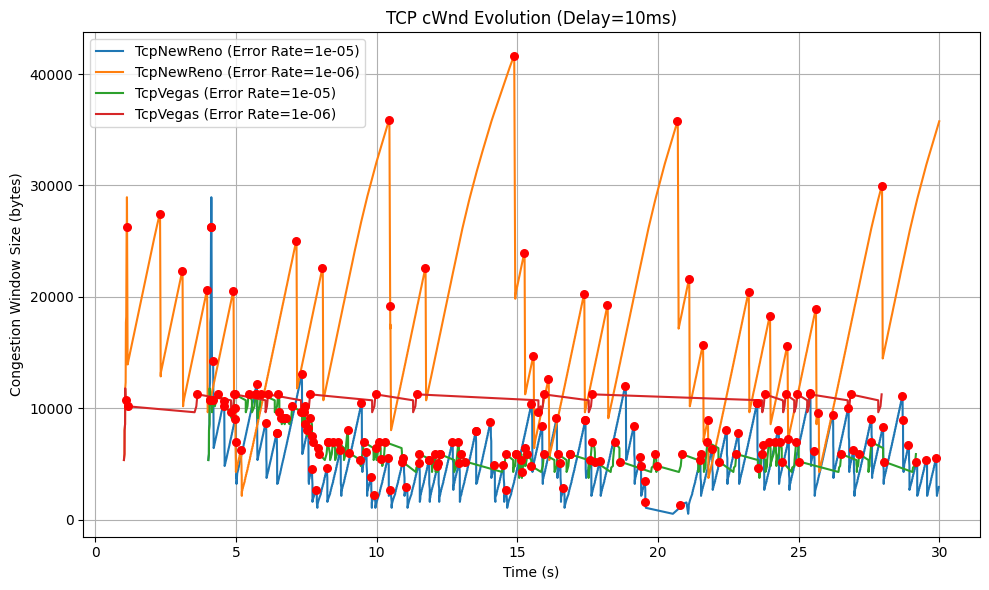

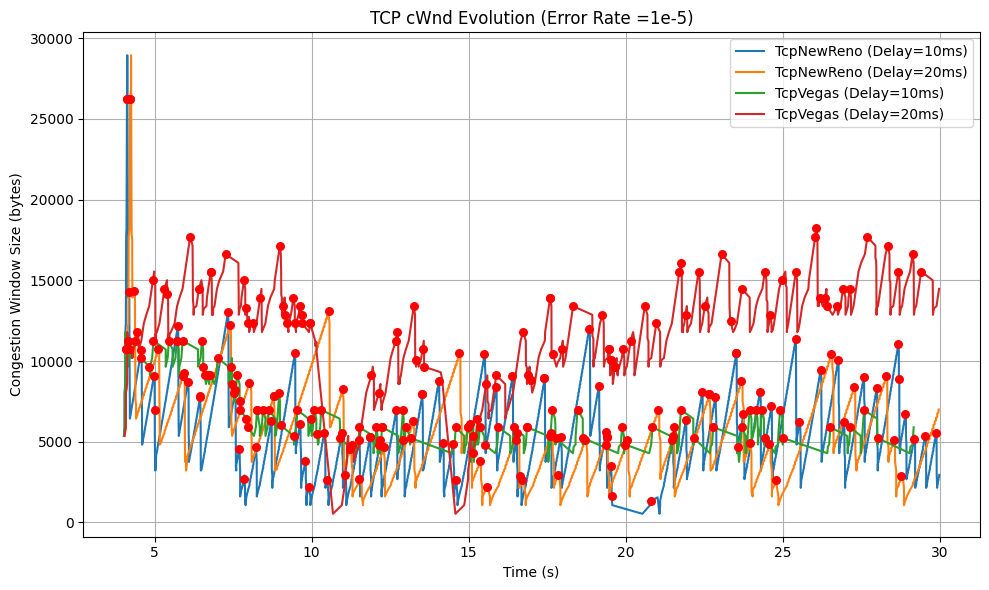

In [2]:
simstudy6.task_6_1_4()

In plot 1, all four curves start with a slow-start ramp: cWnd doubles each RTT until the first loss.
At error rate = 1e-5 loss events appear early and often. Both variants back off, but NewReno collapses cWnd to 0.5 its value and then enters fast-recovery, producing a sawtooth. Vegas shrinks more gently, so its congestions window oscillations are smaller and it recovers steadier.
At error rate = 1e-6, losses are sparser. Both algorithms achieve a higher average congestion window, but NewReno still reacts by halving on each loss—its sawtooth amplitude grows with window size. The window of Vegas hovers close to its α/β targets, so we see long plateaus where it neither grows explosively nor collapses.

In Plot 2 At low round trip time losses are purely from the error rate; at 20 ms we give TCP more “breathing room” but also incur slower feedback. NewReno at 20 ms backs off just as often, but each recovery sweep is stretched over more wall-clock time, so throughput dips deeper and recovers slower. Vegas at 20 ms still avoids aggressive growth—its window climbs linearly based on delay measurements so we see fewer, more evenly spaced drops and a consistently flatter cWnd curve.

For the latency vs. failure-rate Impact, the higher error rate causes more spurious loss events and TCP treats them as congestion and cuts the congestion window. Aggregate throughput falls roughly inversely with drop‐rate. At higher round trip time we see a slower window-growth rate (both in slow-start and congestion-avoidance). NewReno's additive increase becomes real‐time additive over a longer interval and Vegas delay‐based tuning also slows.

NewReno vs. Vegas:
NewReno (loss-based): aggressive slow-start, rapid additive increase, hard halving on loss. Sawtooth patterns deepen with RTT and error rate.
Vegas (delay-based): gentler slow-start exit (it switches at its α threshold), linear window‐growth calibrated by measured queuing delay, softer back-off. Yields fewer drops and steadier cWnd.

Highlighting TCP Phases (example 0 – 8 s window from Plot 1, NewReno at error rate=1e-5) 
0 – 1 s: Slow start—exponential cWnd growth until the first red cross (~8 packets). 
1 – 3 s: Fast recovery & congestion avoidance—cWnd halved then grows by ~1 MSS per RTT. 
3 – 8 s: Repeated sawtooth—each drop triggers fast recovery, then a steady linear climb.

For Vegas in the same window: 
0 – 1.5 s: Slow start—growth slows early if measured RTT exceeds base + α. 
1.5 – 8 s: Delay-based avoidance congestion window inches upward only when queuing delay is below β, backing off softly when delay spikes.

##### 6.2.5: Simulation Study I

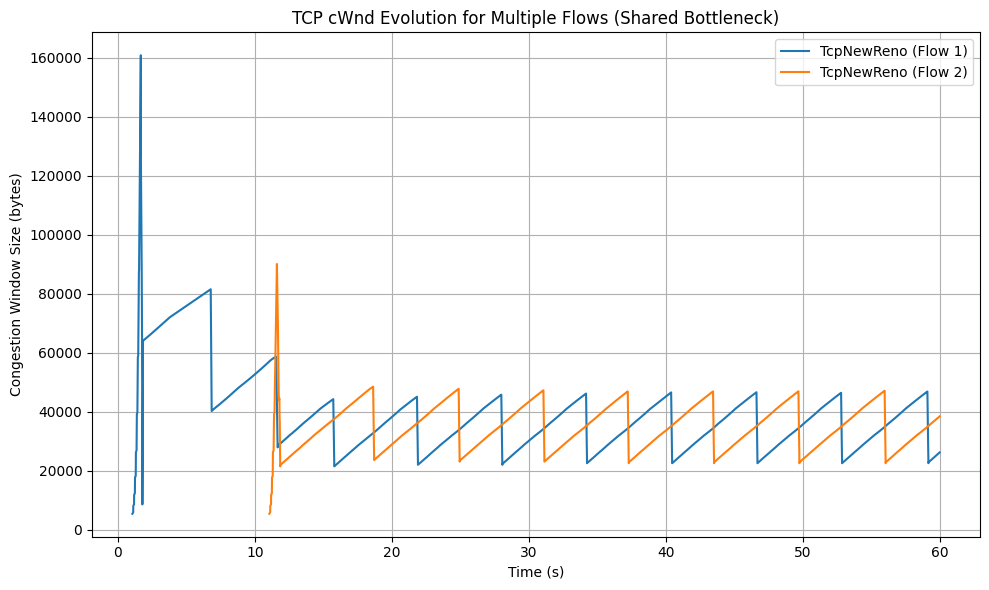

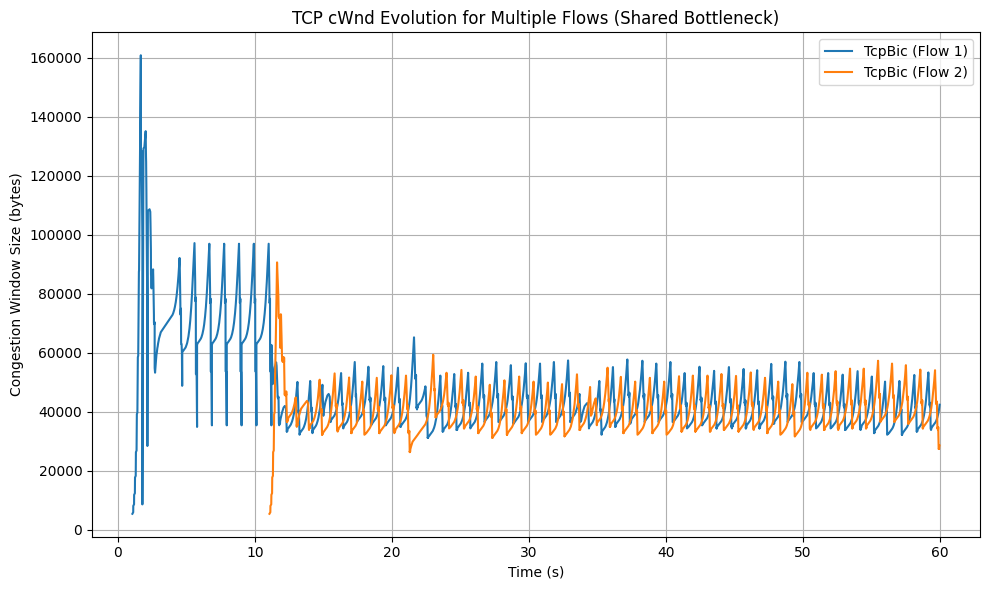

In [7]:
simstudy6.task_6_2_3()

TCP NewReno (top plot) At 11 s the aggregate offered load suddenly jumps from 20 Mb/s to 40 Mb/s on a 10 Mb/s bottleneck. The queue overruns, packets get dropped, and NewReno’s AIMD kicks in. Flow 1 immediately cuts its cWnd in half (multiplicative decrease), so we see that tall blue sawtooth collapse back down by about 50%. Flow 2 starts with the usual slow‐start/congestion avoidance ramp but then also suffers drops as losses recur. From there both flows march upward in lock-step sawtooths, roughly sharing the link: each converges to about half the bottleneck, and you get the classic slow additive increase climb back after every loss.

TCP BIC (bottom plot) The same surge at 11 s causes loss, but BIC's decrease factor is gentler so Flow 1 only dips 10–20%, not 50%. Then, instead of plain +1 MSS/RTT, BIC switches into its binary‐search/cubic probing. It aggressively explores up and down around the last known good congestion window, so both flows begin oscillating with larger swings. Fairness emerges faster than NewReno: the two cwnds lock into a rhythmic pattern around the ideal share, but the oscillation amplitude is higher because BIC hunts more boldly for unused capacity.

##### 6.2.5: Simulation Study II

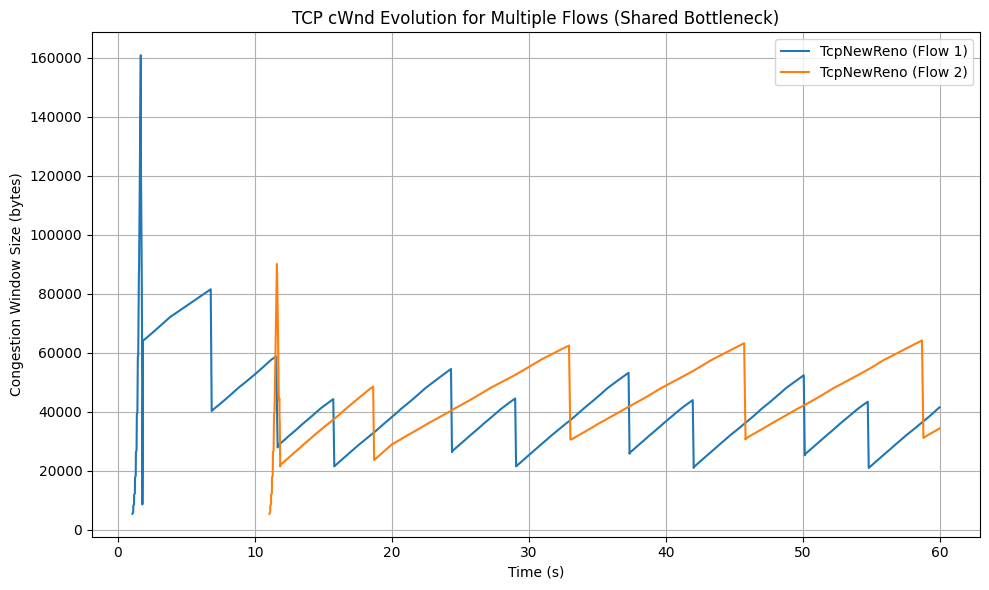

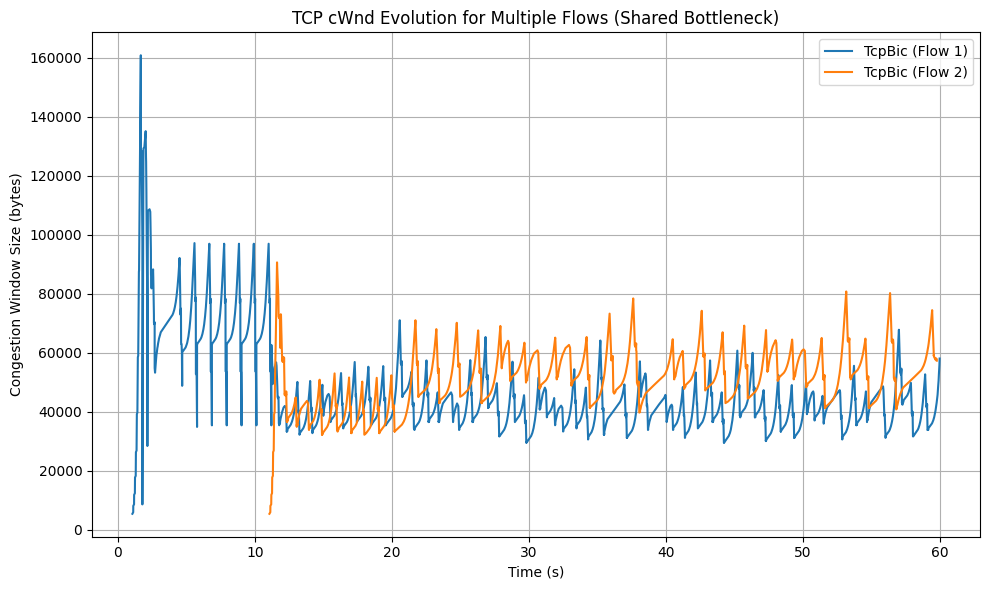

In [2]:
simstudy6.task_6_2_5()

After we double Flow 1s one-way delay at 20s, we suddenly introduce RTT asymmetry. 

TCP NewReno: At 20s Flow 1s RTT jumps, so it gets far fewer ACKs per second. NewReno only raises cWnd by +1 MSS per RTT, so after the delay hit its increase virtually stalls—its sawtooth slope flattens almost to zero. Meanwhile Flow 2 (the short‐RTT flow) keeps climbing at its old rate, so its cWnd races ahead and grabs most of the bottleneck share. We never see Flow 1 recover fairness --> growth stays crippled until the end.

TCP BIC: Its cubic window–growth is driven by wall-clock time, not by ACK arrivals. When Flow 1s RTT jumps, the cubic function keeps ramping almost unaltered. Both flows continue growing at nearly the same rate, so they hold onto a much fairer split of the 10 Mb/s pipe despite the RTT change. We do, however, see the characteristic BIC “overshoot/undershoot” oscillations around the target share, just as before—but the mean cwnd of Flow 1 hardly dips.

##### BONUS: 6.2.6: Simulation Study III

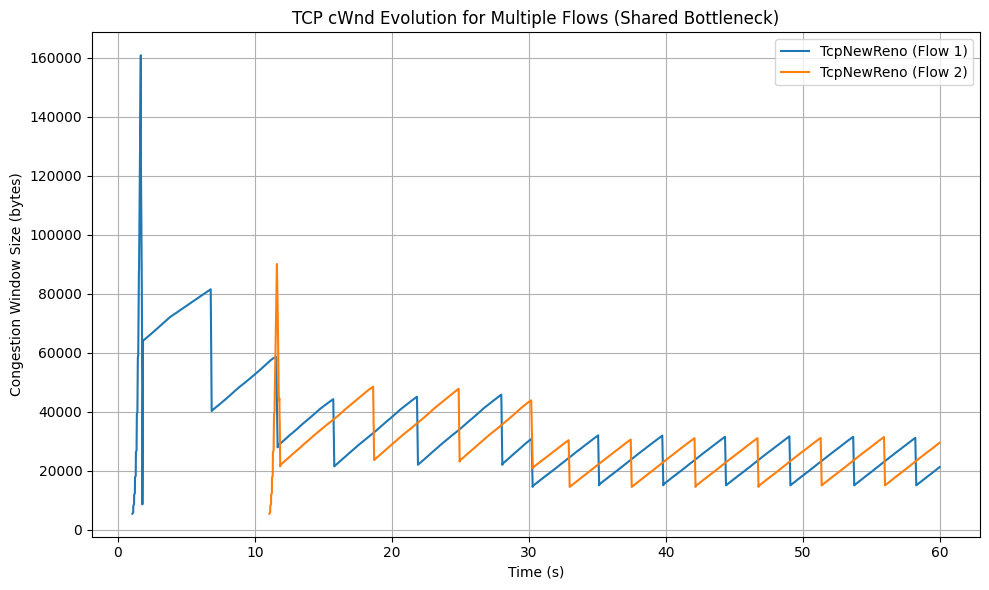

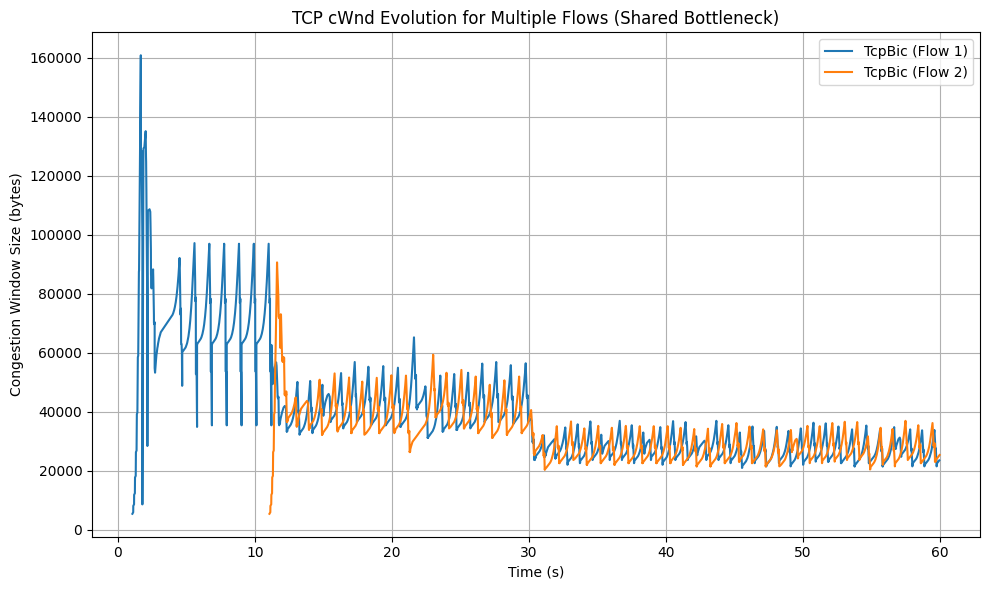

: 

In [2]:
simstudy6.task_6_2_6()

At 30s the UDP flow instantly fills up the 10 Mbs bottleneck, so both TCPs see losses and dump their windows roughly in sync. With half the capacity gone, they both recover to the same smaller fair share so the average cwnd after 30 s is effectively identical for the two flows.
TCP NewReno: Cuts cwnd in half on each loss. Then grows by +1 MSS per RTT, so its saw-tooth is very shallow. Small oscillation amplitude, slow climb back—stays tightly clustered around that new mean, but needs ages to probe above it. TCP BIC backs off less aggressively, so its post-loss dip is shallower. Invokes time-driven cubic robing, so it swings around the equilibrium much faster and with larger overshoot/undershoot. Bigger oscillations around the same mean cwnd, and a noticeably quicker rebound if the UDP flow ever backs off.